             burst_value  hash_start  hash_mid  hash_end
burst_value     1.000000    0.050425 -0.072070 -0.081395
hash_start      0.050425    1.000000  0.014542 -0.022429
hash_mid       -0.072070    0.014542  1.000000  0.041805
hash_end       -0.081395   -0.022429  0.041805  1.000000


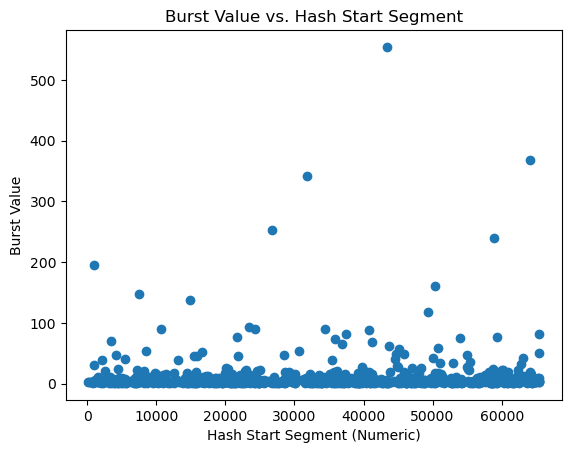

In [2]:
import pandas as pd

# Assuming 'burst_data' is your DataFrame containing the hash and burst values
burst_data = pd.read_csv('burst_data.csv')
# 1. Convert hash segments to numeric features
burst_data['hash_start'] = burst_data['hash'].str[:4].apply(lambda x: int(x, 16))
burst_data['hash_mid'] = burst_data['hash'].str[16:20].apply(lambda x: int(x, 16))
burst_data['hash_end'] = burst_data['hash'].str[-4:].apply(lambda x: int(x, 16))

# 2. Correlation Analysis
correlation_matrix = burst_data[['burst_value', 'hash_start', 'hash_mid', 'hash_end']].corr()
print(correlation_matrix)

# 3. Visualize Relationships
import matplotlib.pyplot as plt
plt.scatter(burst_data['hash_start'], burst_data['burst_value'])
plt.title('Burst Value vs. Hash Start Segment')
plt.xlabel('Hash Start Segment (Numeric)')
plt.ylabel('Burst Value')
plt.show()

# You can create similar scatter plots for hash_mid and hash_end


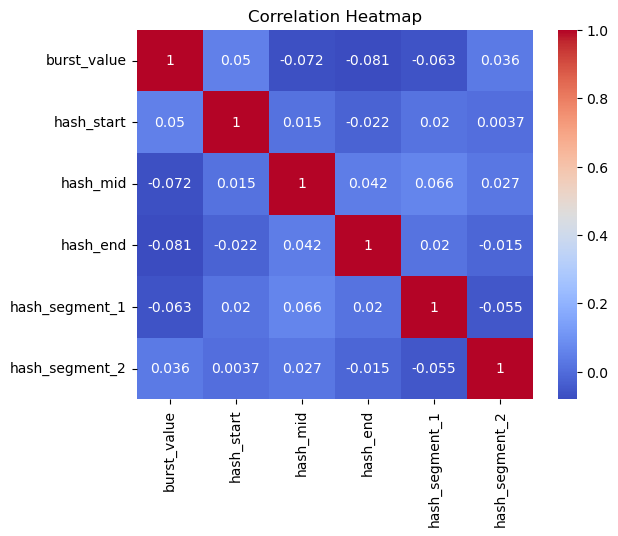

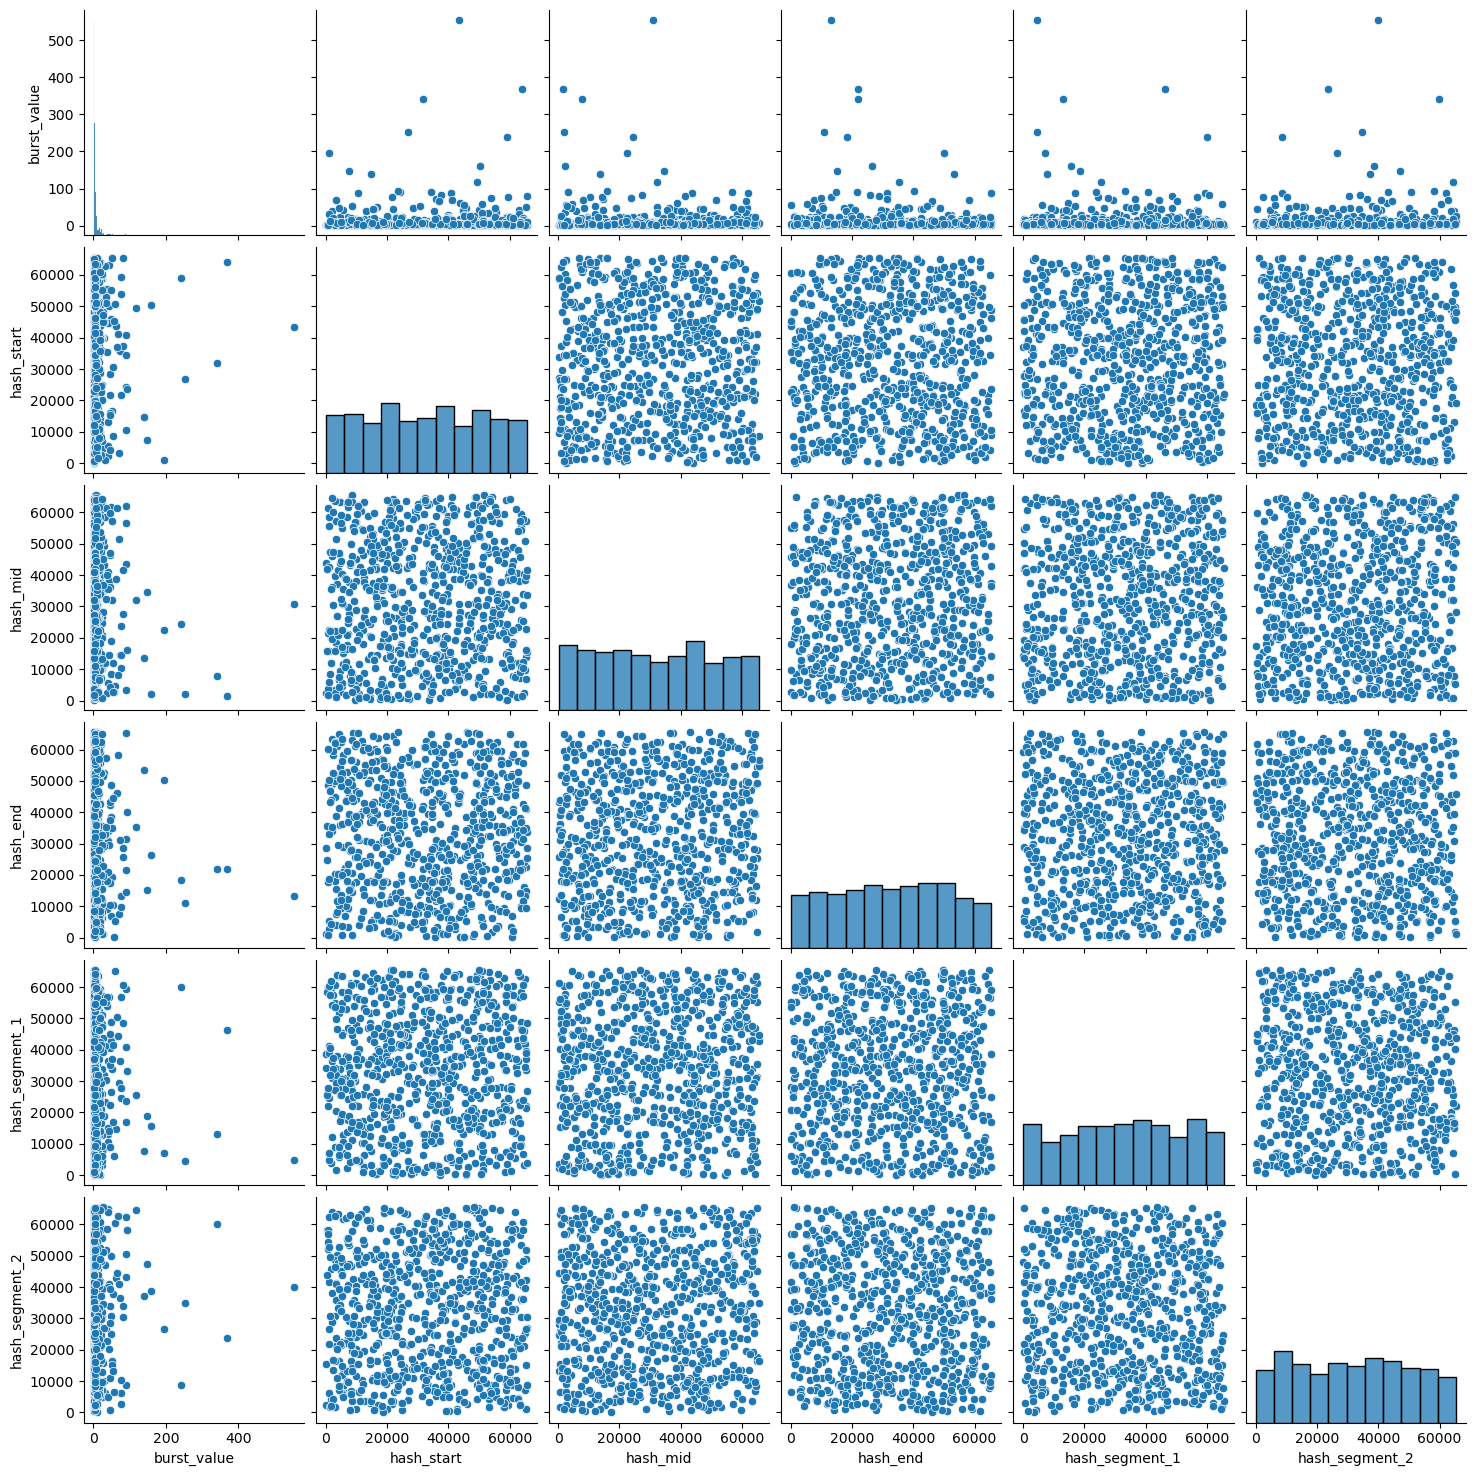

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract additional segments from the hash
burst_data['hash_segment_1'] = burst_data['hash'].str[4:8].apply(lambda x: int(x, 16))
burst_data['hash_segment_2'] = burst_data['hash'].str[8:12].apply(lambda x: int(x, 16))

# Visualize correlations with a heatmap
corr_matrix = burst_data[['burst_value', 'hash_start', 'hash_mid', 'hash_end', 'hash_segment_1', 'hash_segment_2']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(burst_data[['burst_value', 'hash_start', 'hash_mid', 'hash_end', 'hash_segment_1', 'hash_segment_2']])
plt.show()


c:\Users\larie\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


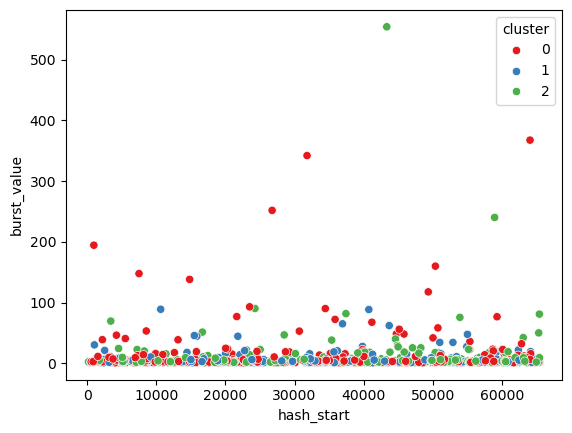

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the hash-derived features
scaler = StandardScaler()
X = scaler.fit_transform(burst_data[['hash_start', 'hash_mid', 'hash_end', 'hash_segment_1', 'hash_segment_2']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
burst_data['cluster'] = kmeans.fit_predict(X)

# Visualize clusters
sns.scatterplot(x='hash_start', y='burst_value', hue='cluster', data=burst_data, palette='Set1')
plt.show()


Mean Squared Error: 1228.487720375708


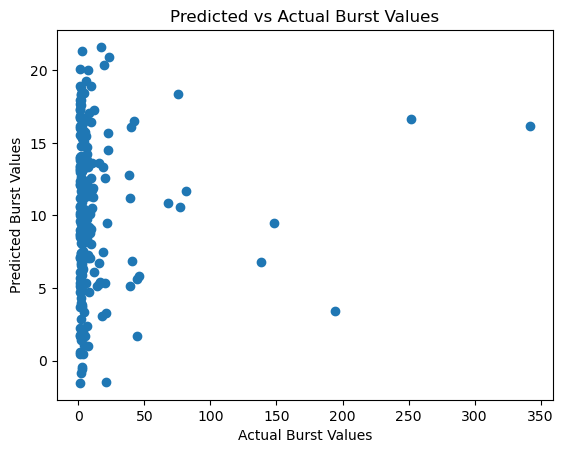

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare features and target
X = burst_data[['hash_start', 'hash_mid', 'hash_end', 'hash_segment_1', 'hash_segment_2']]
y = burst_data['burst_value']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# Scatter plot of predictions vs actual values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Burst Values')
plt.ylabel('Predicted Burst Values')
plt.title('Predicted vs Actual Burst Values')
plt.show()


c:\Users\larie\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


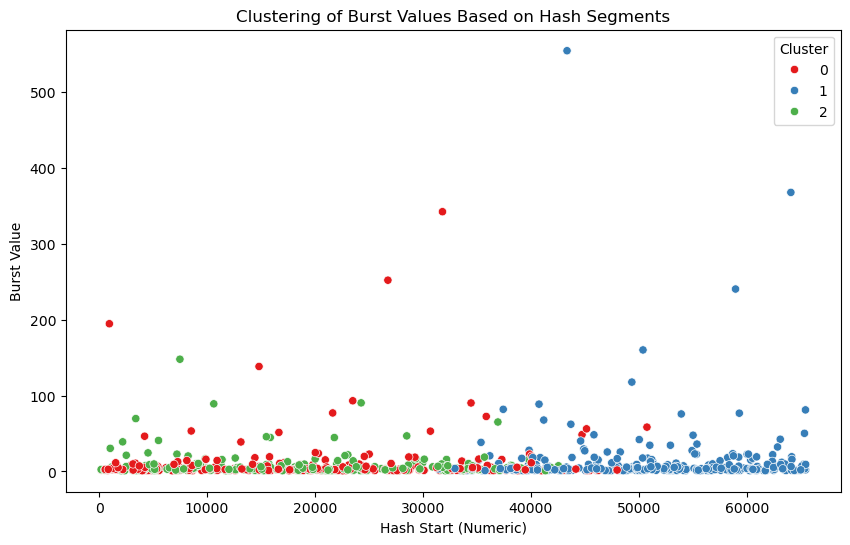

C:\Users\larie\AppData\Local\Temp\ipykernel_13140\2396263744.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='burst_value', data=burst_data, palette='Set1')


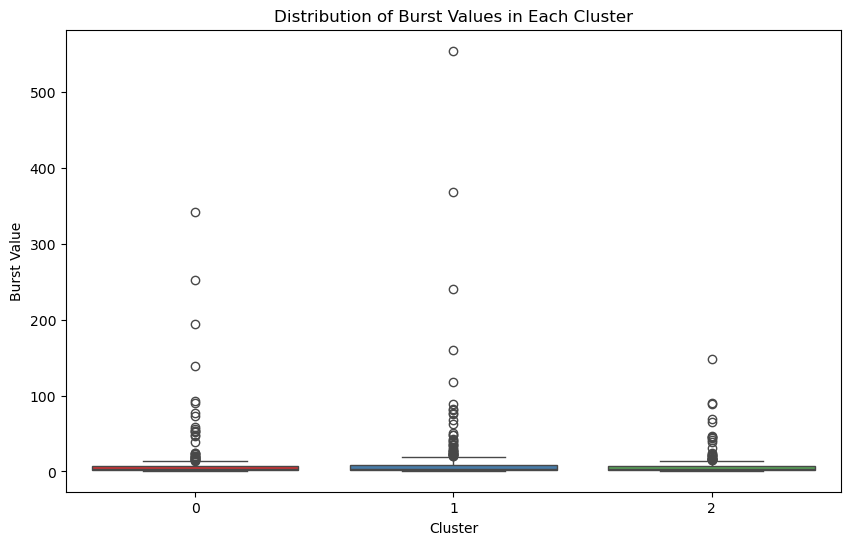

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Extracting relevant hash segments for clustering
# Assuming previous steps of feature extraction have been done
features = burst_data[['hash_start', 'hash_mid', 'hash_end']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
burst_data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='hash_start', y='burst_value', hue='cluster', data=burst_data, palette='Set1')
plt.title('Clustering of Burst Values Based on Hash Segments')
plt.xlabel('Hash Start (Numeric)')
plt.ylabel('Burst Value')
plt.legend(title='Cluster')
plt.show()

# Analyzing the distribution of burst values within each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='burst_value', data=burst_data, palette='Set1')
plt.title('Distribution of Burst Values in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Burst Value')
plt.show()


In [8]:
# Example of extending hash segment extraction
burst_data['hash_segment_3'] = burst_data['hash'].str[12:16].apply(lambda x: int(x, 16))
burst_data['hash_segment_4'] = burst_data['hash'].str[20:24].apply(lambda x: int(x, 16))

# Perform correlation analysis or visualization with these new segments


In [9]:
from scipy.stats import entropy
import numpy as np

# Calculate entropy of the hash (treating each character as a distinct event)
burst_data['hash_entropy'] = burst_data['hash'].apply(lambda x: entropy([x.count(c) for c in set(x)], base=2))

# Analyze the relationship between entropy and burst value


In [10]:
# Create lagged features for burst values
burst_data['burst_value_lag_1'] = burst_data['burst_value'].shift(1)
burst_data['burst_value_lag_2'] = burst_data['burst_value'].shift(2)

# Check if these lagged features have predictive power
